In [1]:
import numpy as np
import matplotlib.pyplot as plt

# arm_input_train_data = np.load('/home/daniel/Documents/data/daniel_baloo_data_collection/STAR/parsed_csvs/not_smooth_all_inputs.npy')
arm_input_train_data = np.load("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/test_data/validation_inputdata.npy")

print(arm_input_train_data.shape)

(100000, 36)


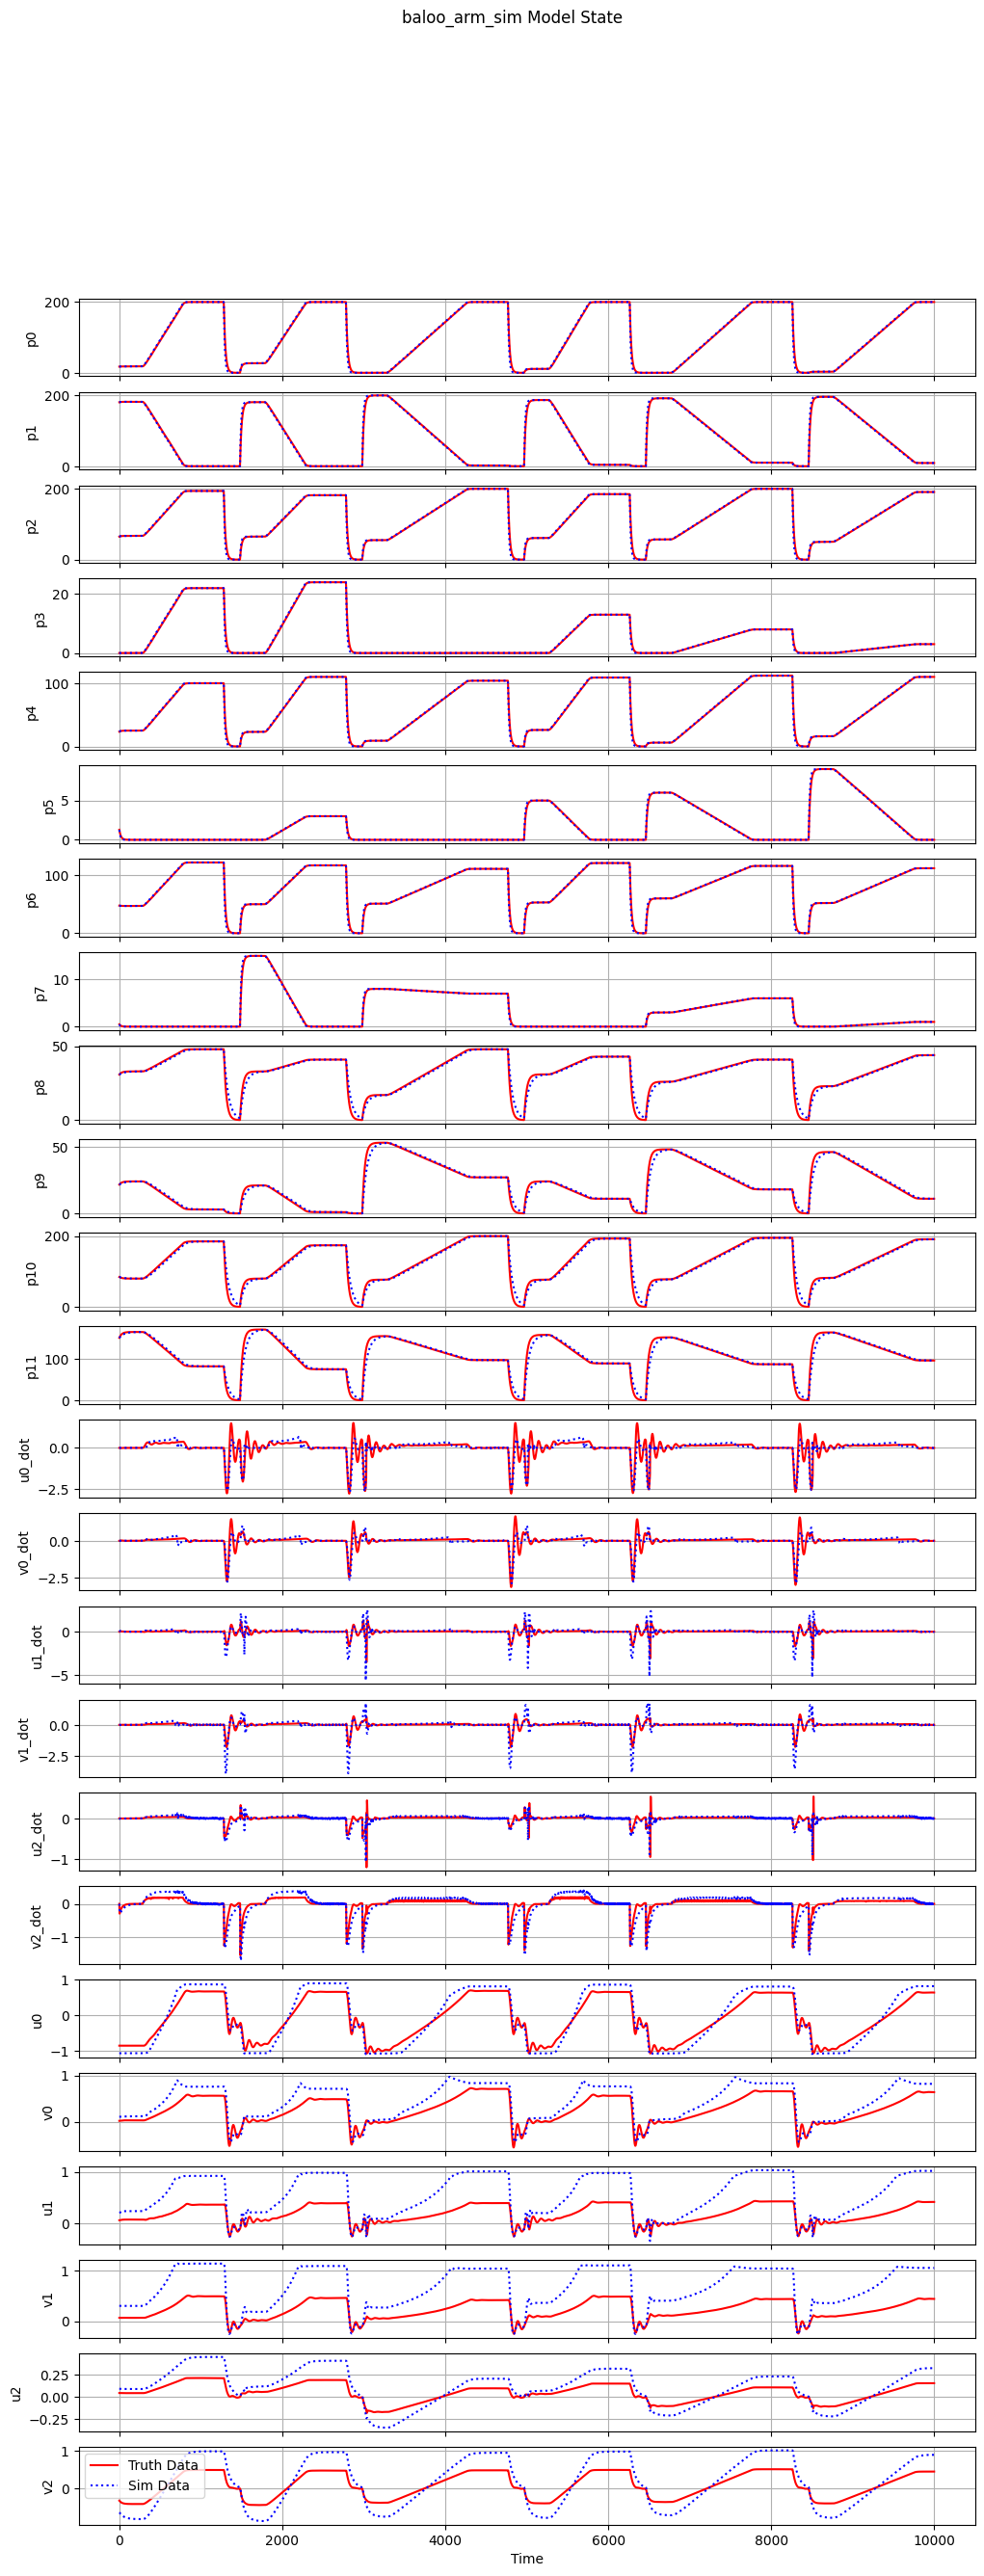

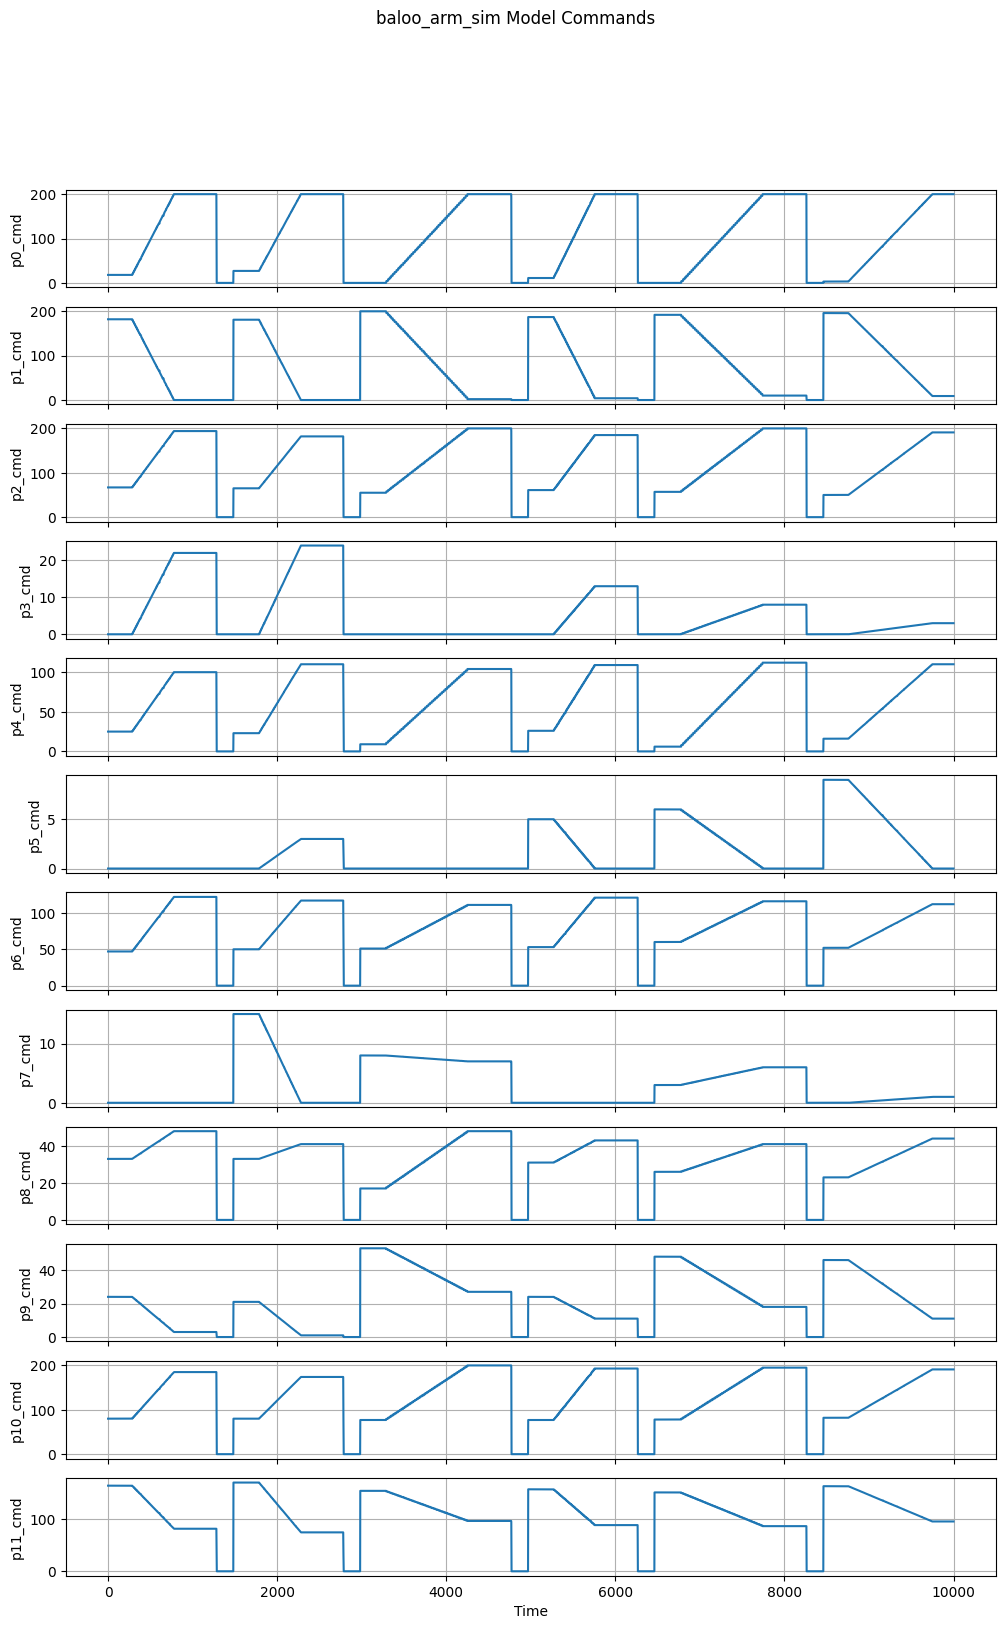

In [2]:
from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim

baloo_sys_id_model = BalooSim()
baloo_original_model = BalooSim("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/baloo.xml")

# x_hardware = arm_input_train_data[:, :24]
u = arm_input_train_data[:, -12:]

num_points = 2000

dt = 0.01
# set initial x
x_sys_id_all = np.zeros((num_points, baloo_sys_id_model.numStates))
x_model_all = np.zeros((num_points, baloo_sys_id_model.numStates))
x_sys_id = arm_input_train_data[0,:24].reshape((1, baloo_sys_id_model.numStates))
x_model = arm_input_train_data[0,:24].reshape((1, baloo_sys_id_model.numStates))

for i in range(1000):
    baloo_sys_id_model.forward_simulate_dt(x_sys_id, x_sys_id[0, :12], dt)
    baloo_original_model.forward_simulate_dt(x_model, x_model[0, :12], dt)

for i in range( num_points):
    x_sys_id = baloo_sys_id_model.forward_simulate_dt(x_sys_id, u[i,:], dt)
    x_sys_id_all[i, :] = x_sys_id.flatten()

    x_model = baloo_original_model.forward_simulate_dt(x_model, u[i,:], dt)
    x_model_all[i, :] = x_model.flatten()

x_labels = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'u0_dot', 'v0_dot', 'u1_dot', 'v1_dot', 'u2_dot', 'v2_dot', 'u0', 'v0', 'u1', 'v1', 'u2', 'v2']
u_labels = ['p0_cmd', 'p1_cmd', 'p2_cmd', 'p3_cmd', 'p4_cmd', 'p5_cmd', 'p6_cmd', 'p7_cmd', 'p8_cmd', 'p9_cmd', 'p10_cmd', 'p11_cmd']
baloo_sys_id_model.plot_history(x_model_all, u[:num_points], x_sys_id_all, x_labels, u_labels, block=False, save_path="/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/baloo_sys_id_vs_original_simulations.png")